In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('loan-train.csv')
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
49,LP001151,Female,No,0,Graduate,No,4000,2275.0,144.0,360.0,1.0,Semiurban,Y
396,LP002277,Female,No,0,Graduate,No,3180,0.0,71.0,360.0,0.0,Urban,N
399,LP002287,Female,No,0,Graduate,No,1500,1800.0,103.0,360.0,0.0,Semiurban,N
530,LP002717,Male,Yes,0,Graduate,No,1025,5500.0,216.0,360.0,NaN,Rural,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
573,LP002862,Male,Yes,2,Not Graduate,No,6125,1625.0,187.0,480.0,1.0,Semiurban,N
80,LP001265,Female,No,0,Graduate,No,3846,0.0,111.0,360.0,1.0,Semiurban,Y
391,LP002262,Male,Yes,3+,Graduate,No,9504,0.0,275.0,360.0,1.0,Rural,Y
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y


In [3]:
cat_features = [ i for i in df.columns if df[i].dtype == 'O']
cat_features.remove('Loan_ID')
cat_features.remove('Loan_Status')
cat_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [4]:
num_features = [ i for i in df.columns if df[i].dtype != 'O']
num_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

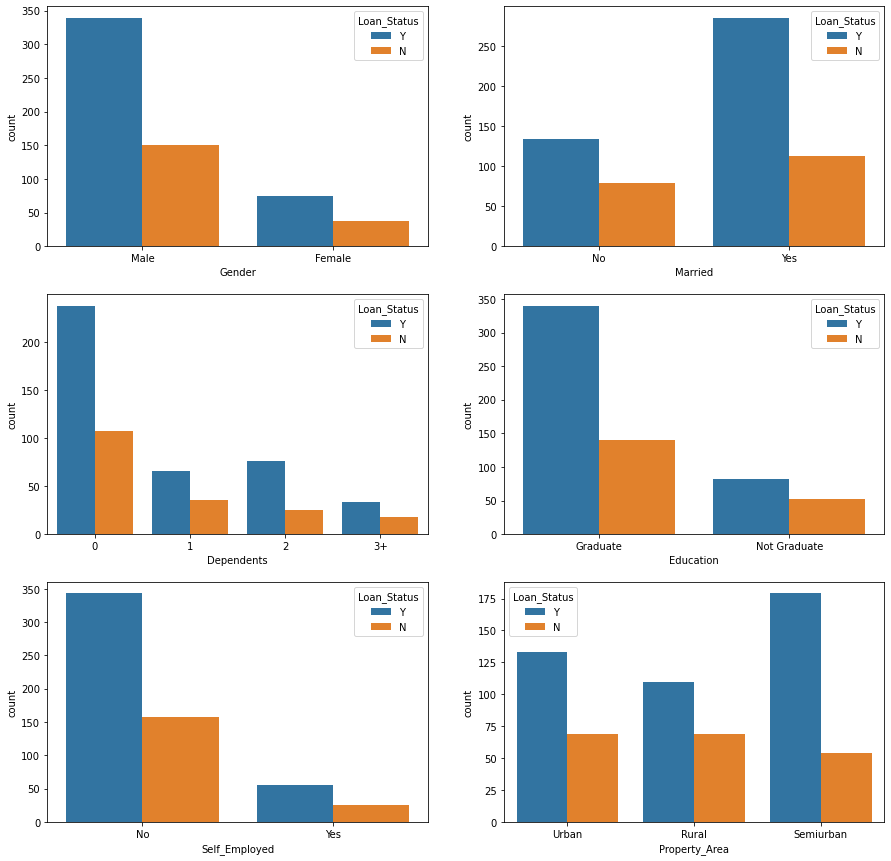

In [5]:
fig, ax = plt.subplots(3,2, figsize = (15,15))
axs = ax.ravel()
for i, feature in enumerate(cat_features):
    sns.countplot(x = feature, hue = 'Loan_Status', ax = axs[i], data = df)

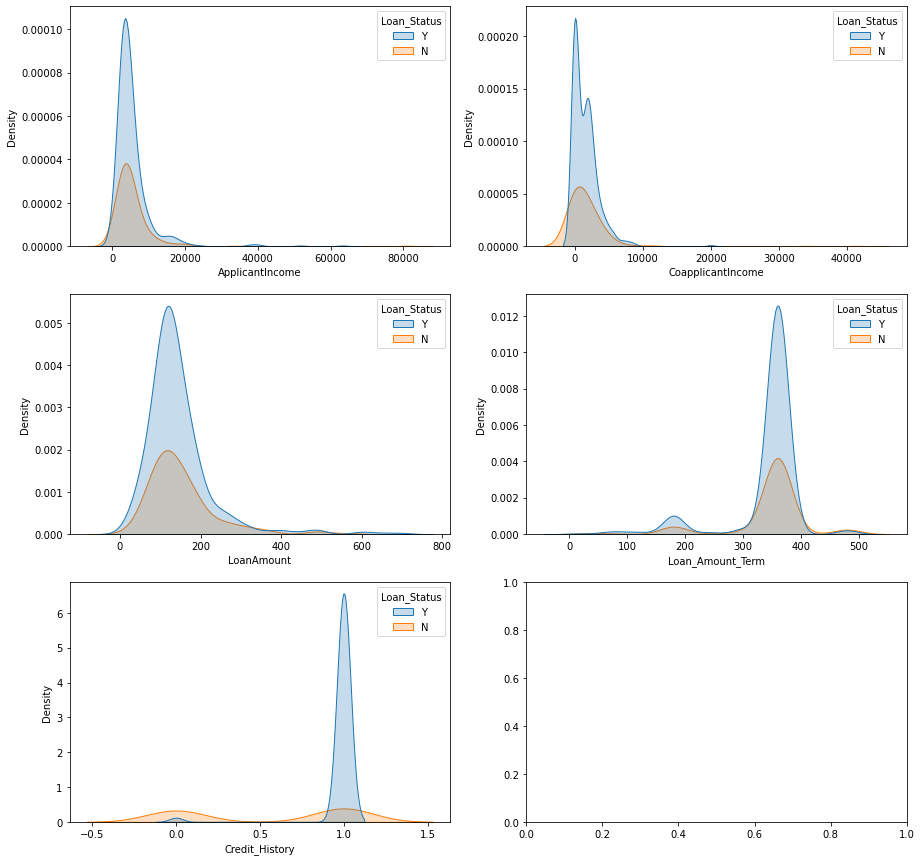

In [6]:
fig, ax = plt.subplots(3,2, figsize = (15,15))
axs = ax.ravel()
for i, feature in enumerate(num_features):
    sns.kdeplot(x = feature, hue = 'Loan_Status', ax = axs[i], data = df, fill = True)

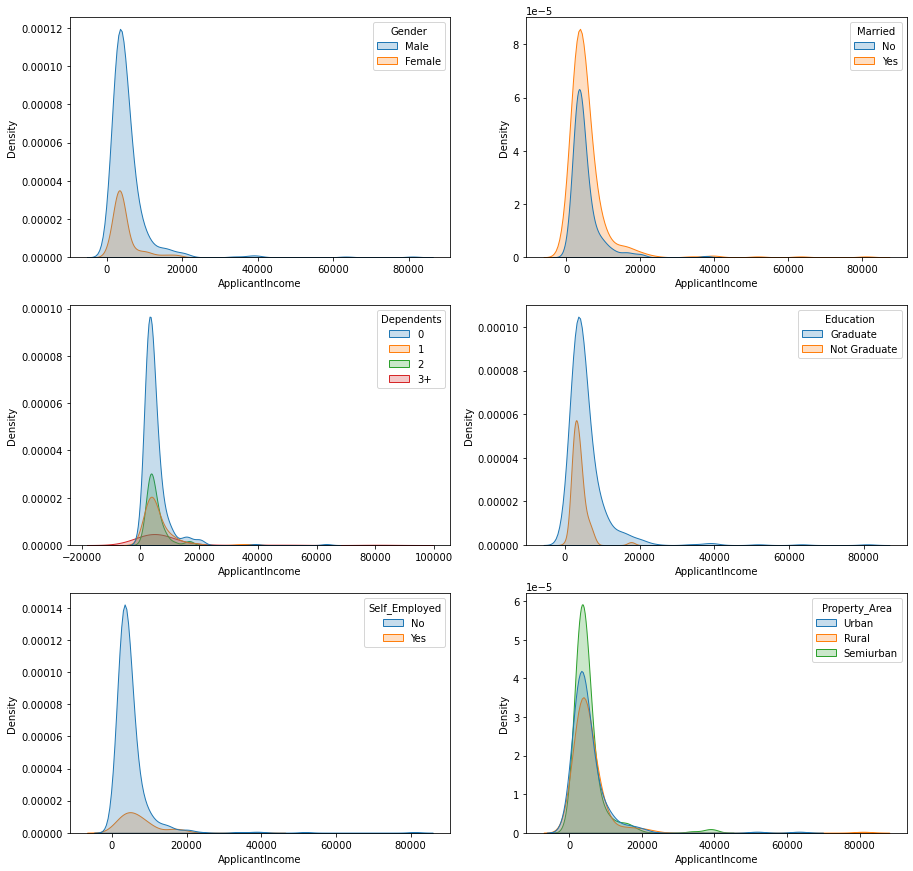

In [7]:
fig, ax = plt.subplots(3,2, figsize = (15,15))
axs = ax.ravel()
for i, feature in enumerate(cat_features):
    sns.kdeplot(x = 'ApplicantIncome', hue = feature, ax = axs[i], data = df, fill = True)

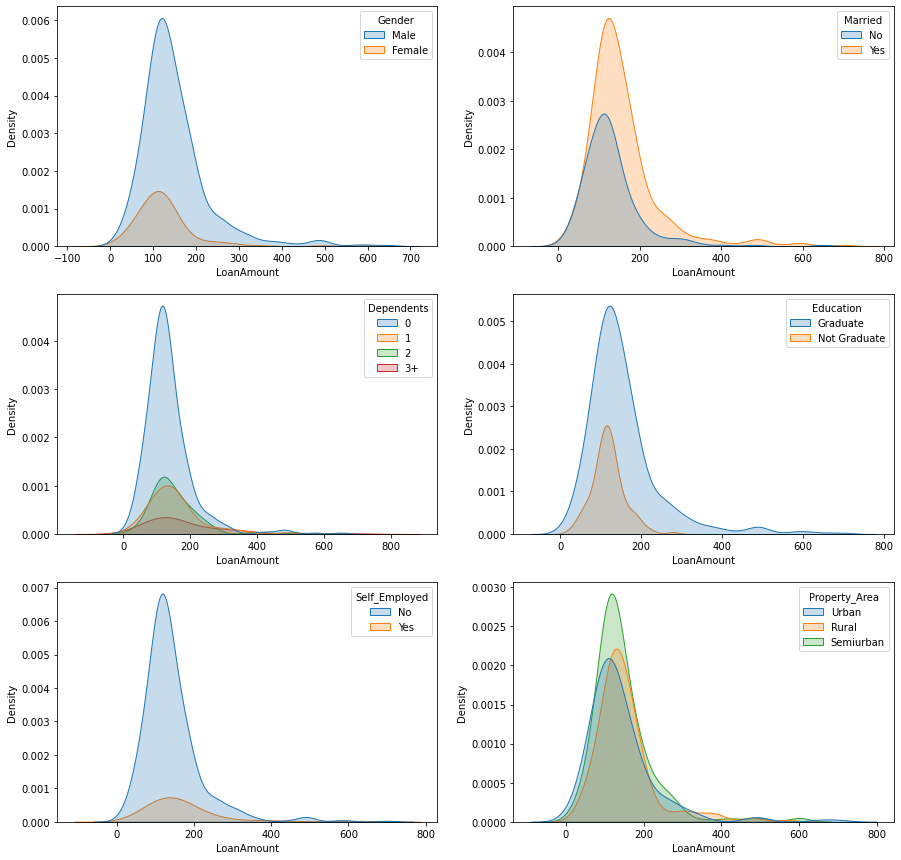

In [8]:
fig, ax = plt.subplots(3,2, figsize = (15,15))
axs = ax.ravel()
for i, feature in enumerate(cat_features):
    sns.kdeplot(x = 'LoanAmount', hue = feature, ax = axs[i], data = df, fill = True)

In [9]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [12]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [13]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [14]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [15]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)

In [16]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [20]:
df.drop(columns = ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis = 1, inplace = True)

In [21]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,6000.0


<AxesSubplot:>

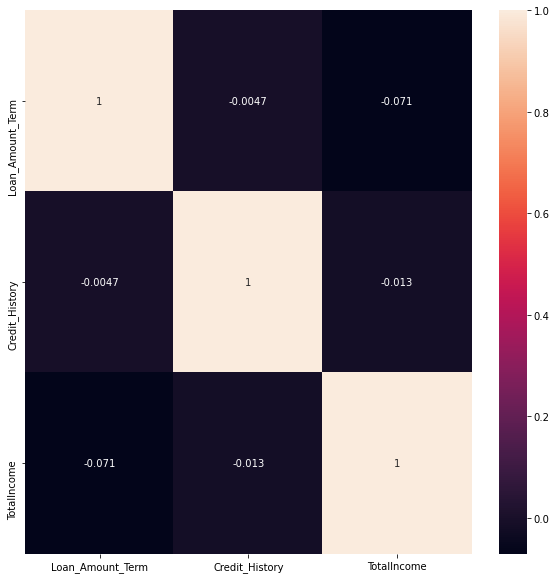

In [22]:
corr_matrix = df.corr()
corr_features = corr_matrix.index
plt.figure(figsize = (10,10))
sns.heatmap(df[corr_features].corr(), annot = True)

<AxesSubplot:>

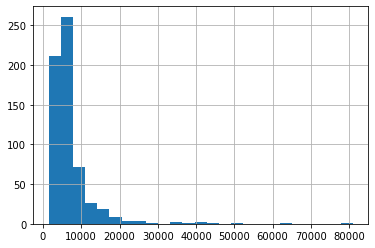

In [23]:
df['TotalIncome'].hist(bins = 25)

<AxesSubplot:>

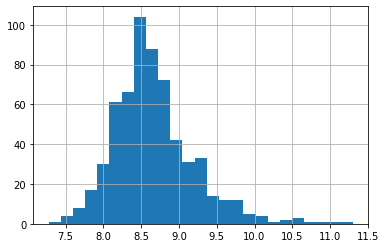

In [24]:
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins = 25)

In [25]:
#df['LoanAmount'].hist(bins = 25)

In [26]:
#df['LoanAmount_log'] = np.log(df['LoanAmount'])
#df['LoanAmount_log'].hist(bins = 25)

In [28]:
#df.drop(columns = ['LoanAmount','TotalIncome'], axis = 1, inplace = True)
df.drop(columns = ['TotalIncome'], axis = 1, inplace = True)

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome_log
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,8.674026
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,8.714568
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,8.505323
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,8.699515


In [30]:
df = pd.get_dummies(df, drop_first = True)

In [31]:
df.head()

,Loan_Amount_Term,Credit_History,TotalIncome_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,360.0,1.0,8.674026,1,0,0,0,0,0,0,0,1,1
1,360.0,1.0,8.714568,1,1,1,0,0,0,0,0,0,0
2,360.0,1.0,8.006368,1,1,0,0,0,0,1,0,1,1
3,360.0,1.0,8.505323,1,1,0,0,0,1,0,0,1,1
4,360.0,1.0,8.699515,1,0,0,0,0,0,0,0,1,1


In [32]:
df.shape

(614, 13)

In [33]:
y = df['Loan_Status_Y']
X = df.drop('Loan_Status_Y', axis = 1)

In [34]:
print('shape of X:', X.shape)
print('shape of y:', y.shape)

shape of X: (614, 12)
shape of y: (614,)


In [35]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 5)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [37]:
#logistic regression
log_model = LogisticRegression()
log_model.fit(xtrain, ytrain)

ypred = log_model.predict(xtest)

con_matrix = confusion_matrix(ytest, ypred)
acc_score = accuracy_score(ytest, ypred)
report = classification_report(ytest, ypred)
cross_score = cross_val_score(log_model, X, y)
score = np.mean(cross_score)

print('con_matrix:', con_matrix)
print('acc_score:', acc_score)
print('report:',report)
print('score:',score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

con_matrix: [[ 25  26]
 [  4 130]]
acc_score: 0.8378378378378378
report:               precision    recall  f1-score   support

           0       0.86      0.49      0.62        51
           1       0.83      0.97      0.90       134

    accuracy                           0.84       185
   macro avg       0.85      0.73      0.76       185
weighted avg       0.84      0.84      0.82       185

score: 0.809462881514061


In [38]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [39]:
#Hyperparameter tuning
log_params = {'penalty':['l1', 'l2'], 
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100], 
              'solver':['liblinear', 'saga']}
log_model = GridSearchCV(LogisticRegression(), log_params, cv=5)
result = log_model.fit(xtrain, ytrain)

In [42]:
print('Best parameters:',result.best_params_)
print('Model score:',result.score(xtest, ytest))

log_predict = result.predict(xtest)
log_cm = confusion_matrix(ytest, log_predict)
log_score = accuracy_score(ytest, ypred)

print('confusion matrix:', log_cm)
print('Accuracy score:', log_score)

Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Model score: 0.8378378378378378
confusion matrix: [[ 25  26]
 [  4 130]]
Accuracy score: 0.8378378378378378


In [50]:
#SGD classifier
clf = SGDClassifier(eta0=0.0001, alpha=0.01, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
result = clf.fit(xtrain, ytrain)

-- Epoch 1
Norm: 0.01, NNZs: 12, Bias: 0.007311, T: 429, Avg. loss: 0.691165
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 12, Bias: 0.014545, T: 858, Avg. loss: 0.686940
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 12, Bias: 0.021706, T: 1287, Avg. loss: 0.682809
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.04, NNZs: 12, Bias: 0.028788, T: 1716, Avg. loss: 0.678771
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.06, NNZs: 12, Bias: 0.035790, T: 2145, Avg. loss: 0.674823
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 12, Bias: 0.042719, T: 2574, Avg. loss: 0.670964
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.08, NNZs: 12, Bias: 0.049574, T: 3003, Avg. loss: 0.667189
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.09, NNZs: 12, Bias: 0.056352, T: 3432, Avg. loss: 0.663499
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.10, NNZs: 12, Bias: 0.063059, T: 3861, Avg. loss: 0.659891
Total training time:

In [51]:
print('Model score:',result.score(xtest, ytest))

log_predict = clf.predict(xtest)
log_cm = confusion_matrix(ytest, log_predict)
log_score = accuracy_score(ytest, ypred)

print('confusion matrix:', log_cm)
print('Accuracy score:', log_score)

Model score: 0.8378378378378378
confusion matrix: [[ 25  26]
 [  4 130]]
Accuracy score: 0.8378378378378378
